In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [2]:
#Load dataset
telcodf = pd.read_csv("telco-customer-churn.csv", sep=',')
pd.set_option('display.max_columns', None)
telcodf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

In [7]:
print(telcodf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB
None


In [ ]:
# Check for missing values
telcodf.isnull().sum()

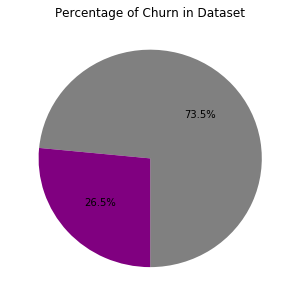

In [4]:
# check the distribution of the target class
sizes = telcodf['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
mpl.rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, colors=colors,
        autopct='%1.1f%%', startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

# Data cleaning

In [5]:
# Drop data that may be irrelevant
telcodf.drop(['customerID'], axis=1, inplace = True)

In [16]:
# Change data types
def to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
    
telcodf['MonthlyCharges'] = pd.to_numeric(telcodf['MonthlyCharges'])
telcodf['TotalCharges'] = telcodf['TotalCharges'].apply(to_float)

In [48]:
#Split the data into features and target
telcodf_onehot = telcodf.copy()

X = telcodf_onehot.drop(['Churn'], axis = 1)
y = telcodf_onehot['Churn'].values

In [57]:
# Transform the categorical data using the one hot encoding approach

string_df = X.select_dtypes(include='object')
string_cols = list(string_df.columns)


X = pd.get_dummies(X, columns = string_cols, prefix = string_cols)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [58]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [59]:
X = np.nan_to_num(X)
#X = X.fillna(X.mean())

In [60]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [61]:
# Use LabelEncoder for the target class
from sklearn.preprocessing import LabelEncoder
lb_target = LabelEncoder()
y = lb_target.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

# Modeling

In [81]:
# Create the pipeline. 
logistic = LogisticRegression(solver = 'lbfgs')
pca = PCA()
scaler = StandardScaler()
steps = [('scaler', scaler), ('pca', pca), ('logistic', logistic )] 

#The strings (‘scaler’, ‘SVM’) can be anything, as
#these are just names to identify clearly the transform or estimator.

# Pipeline object
pipeline = Pipeline(steps) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,
                                                   random_state = 30, stratify = y)


In [82]:
# use gridsearch 
n_components = [5, 10, 30]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

from sklearn.model_selection import GridSearchCV
estimator = GridSearchCV(pipeline,
                         param_grid={
                             'pca__n_components': n_components,
                             'logistic__C': Cs},
                                 cv=5,
                                 refit=True)


estimator.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=F

In [83]:
X_test = np.nan_to_num(X_test)

In [84]:
predictions = estimator.predict(X_test)
print(classification_report(y_test, predictions))
print("score = %3.2f" %estimator.score(X_test, y_test))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1035
         Yes       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

score = 0.79
